# The Correlation Coefficient

The correlation coefficient measures the extent to which the relationship between two variables is linear. Its value is always between -1 and 1. A positive coefficient indicates that the variables are directly related, i.e. when one increases the other one also increases. A negative coefficient indicates that the variables are inversely related, so that when one increases the other decreases. The closer to 0 the correlation coefficient is, the weaker the relationship between the variables.

The correlation coefficient of two series $X$ and $Y$ is defined as
$$r = \frac{Cov(X,Y)}{std(X)std(Y)}$$
where $Cov$ is the covariance and $std$ is the standard deviation.

Two random sets of data will have a correlation coefficient close to 0:

##Correlation vs. Covariance

Correlation is simply a normalized form of covariance. They are otherwise the same and are often used semi-interchangeably in everyday conversation. It is obviously important to be precise with language when discussing the two, but conceptually they are almost identical.

The following output describes the extent to which Apple and Microsoft are correlated with their benchmark S&P 500.
Since, the corellation coefficient is above 0.5, hence, both are positively and strongly correlated to S&P 500


Coefficient of correlation between : 
S&P 500 and Microsoft =  0.759425846818
S&P 500 and Apple =  0.466362672702


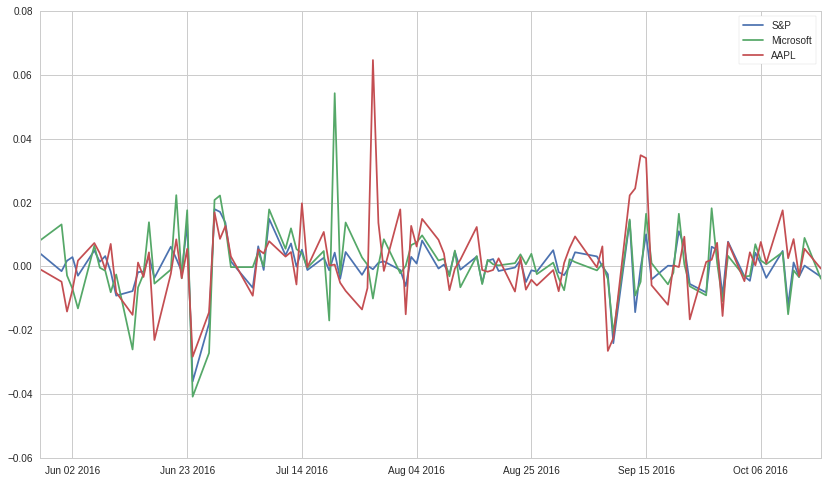

In [36]:
start = '2016-01-01'
end = '2017-01-01'
freq = 'daily'

benchmark = get_pricing('SPY', start_date=start, end_date= end, frequency= freq, fields = 'price')[100:200]
MSFT = get_pricing('MSFT', start_date=start, end_date= end, frequency= freq, fields = 'price')[100:200]
AAPL = get_pricing('AAPL', start_date=start, end_date= end, frequency= freq, fields = 'price')[100:200]

SPY_returns = benchmark.pct_change()[1:]
MSFT_returns = MSFT.pct_change()[1:]
AAPL_returns = AAPL.pct_change()[1:]

plt.plot(SPY_returns)
plt.plot(MSFT_returns)
plt.plot(AAPL_returns)
plt.legend(['S&P','Microsoft','AAPL'])

print 'Coefficient of correlation between : '
print 'S&P 500 and Microsoft = ', np.corrcoef(SPY_returns.values, MSFT_returns.values) [0,1]
print 'S&P 500 and Apple = ', np.corrcoef(SPY_returns.values, AAPL_returns.values) [0,1]

 
 
 The following is the output for rolling correlation coefficient.
 Hence, using a window of thirty days, we calculate the correlation coefficient. This is why the graph starts from July 12  instead of June 2, as first 30 entries are required to produce 1 correlation coefficient. Then the 2nd day to 31st day data is used for another one, as so on.


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30).corr(other=<Series>)
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30).corr(other=<Series>)
  This is separate from the ipykernel package so we can avoid doing imports until


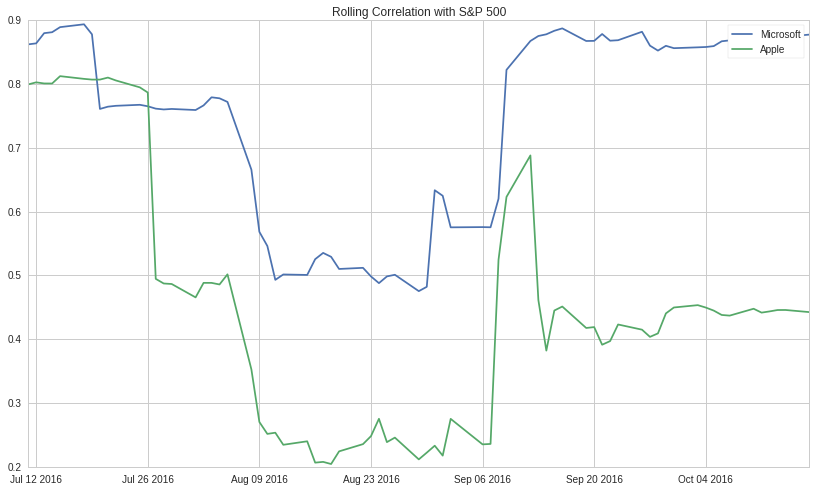

In [38]:
rolling_Msft = pd.rolling_corr(SPY_returns, MSFT_returns, 30)
plt.plot(rolling_Msft)
rolling_Apple = pd.rolling_corr(SPY_returns, AAPL_returns, 30)
plt.plot(rolling_Apple)
plt.title('Rolling Correlation with S&P 500')
plt.legend(['Microsoft','Apple'])

## How is this useful in finance?

### Determining related assets

Once we've established that two series are probably related, we can use that in an effort to predict future values of the series. For example, let's look at the price of Apple and a semiconductor equipment manufacturer, Lam Research Corporation.

Correlation coefficients
LRCX and AAPL:  0.954684674528
LRCX and SPY:  0.935191172334
AAPL and SPY:  0.89214568707


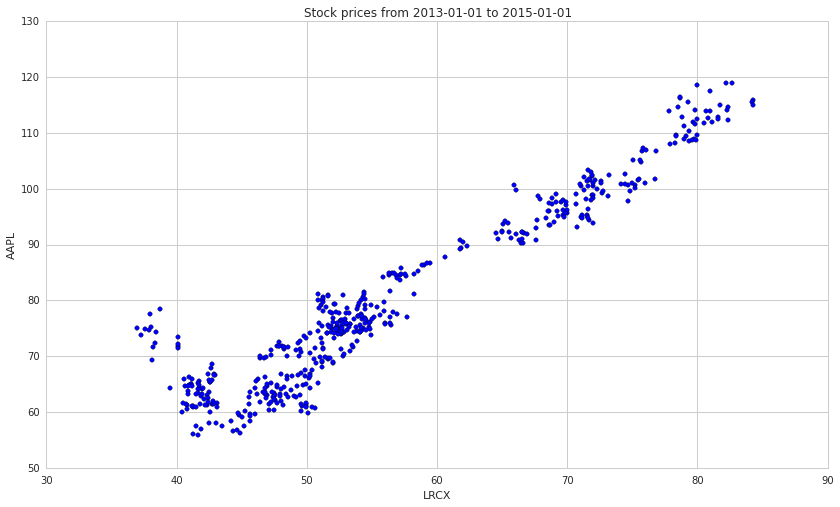

In [9]:
# Pull the pricing data for our two stocks and S&P 500
start = '2013-01-01'
end = '2015-01-01'
bench = get_pricing('SPY', fields='price', start_date=start, end_date=end)
a1 = get_pricing('LRCX', fields='price', start_date=start, end_date=end)
a2 = get_pricing('AAPL', fields='price', start_date=start, end_date=end)

plt.scatter(a1,a2)
plt.xlabel('LRCX')
plt.ylabel('AAPL')
plt.title('Stock prices from ' + start + ' to ' + end)
print "Correlation coefficients"
print "LRCX and AAPL: ", np.corrcoef(a1,a2)[0,1]
print "LRCX and SPY: ", np.corrcoef(a1,bench)[0,1]
print "AAPL and SPY: ", np.corrcoef(bench,a2)[0,1]

### Constructing a portfolio of uncorrelated assets

Another reason that correlation is useful in finance is that uncorrelated assets produce the best portfolios. The intuition for this is that if the assets are uncorrelated, a drawdown in one will not correspond with a drawdown in another. This leads to a very stable return stream when many uncorrelated assets are combined.